In [18]:
#import standard packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [19]:
#read the csv file
telco_churn=pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [20]:
telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
#show columns
telco_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
churn_no=telco_churn[telco_churn["Churn"]=="No"]
churn_yes=telco_churn[telco_churn["Churn"]=="Yes"]

1. Demographic:
a. Which 2 demographics have proven to be the most popular with the telco brand?
b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [23]:
churn_no.groupby(['gender','SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count()

gender  SeniorCitizen  Partner  Dependents
Female  0              No       No            909
                                Yes           110
                       Yes      No            482
                                Yes           720
        1              No       No            159
                                Yes             2
                       Yes      No            136
                                Yes            31
Male    0              No       No            963
                                Yes           168
                       Yes      No            439
                                Yes           717
        1              No       No            126
                                Yes             4
                       Yes      No            176
                                Yes            32
Name: Churn, dtype: int64

In [24]:
churn_yes.groupby(['gender','SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count()

gender  SeniorCitizen  Partner  Dependents
Female  0              No       No            429
                                Yes            32
                       Yes      No            114
                                Yes           124
        1              No       No            158
                                Yes             1
                       Yes      No             73
                                Yes             8
Male    0              No       No            418
                                Yes            43
                       Yes      No            128
                                Yes           105
        1              No       No            118
                                Yes             1
                       Yes      No            105
                                Yes            12
Name: Churn, dtype: int64

In [25]:
#Answer - Male and female who are not senior citizens, do not have partners and do no also have dependants

2. Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

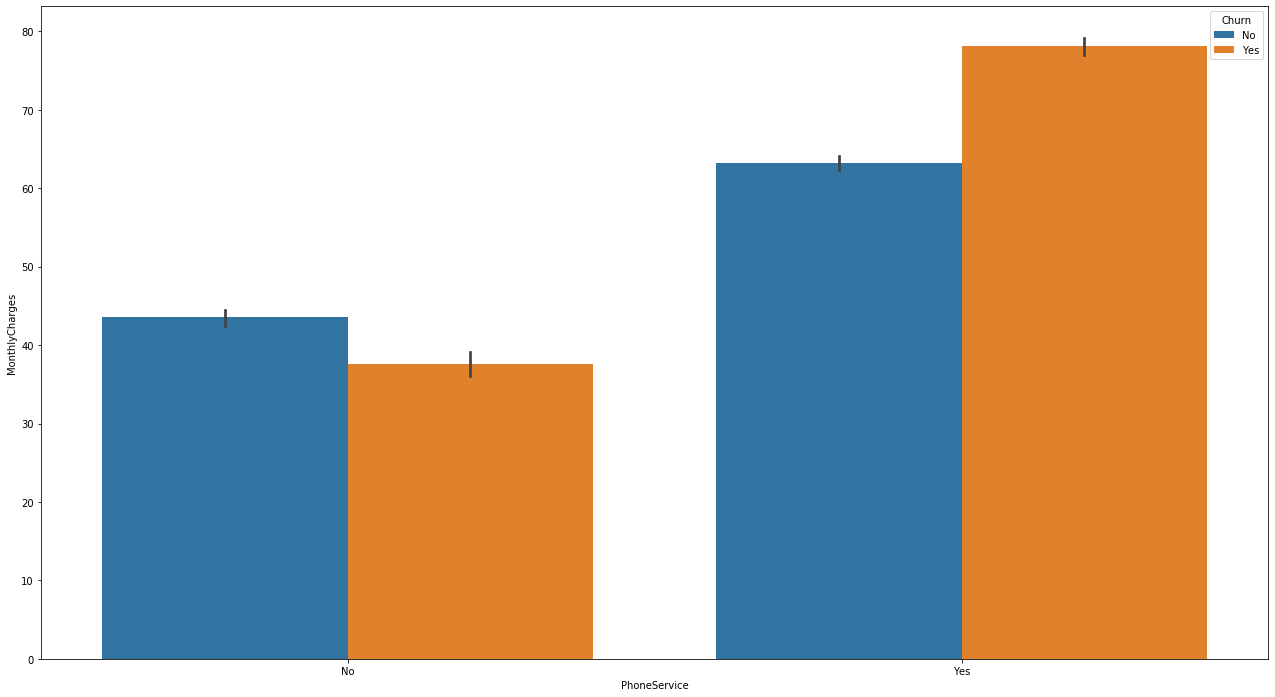

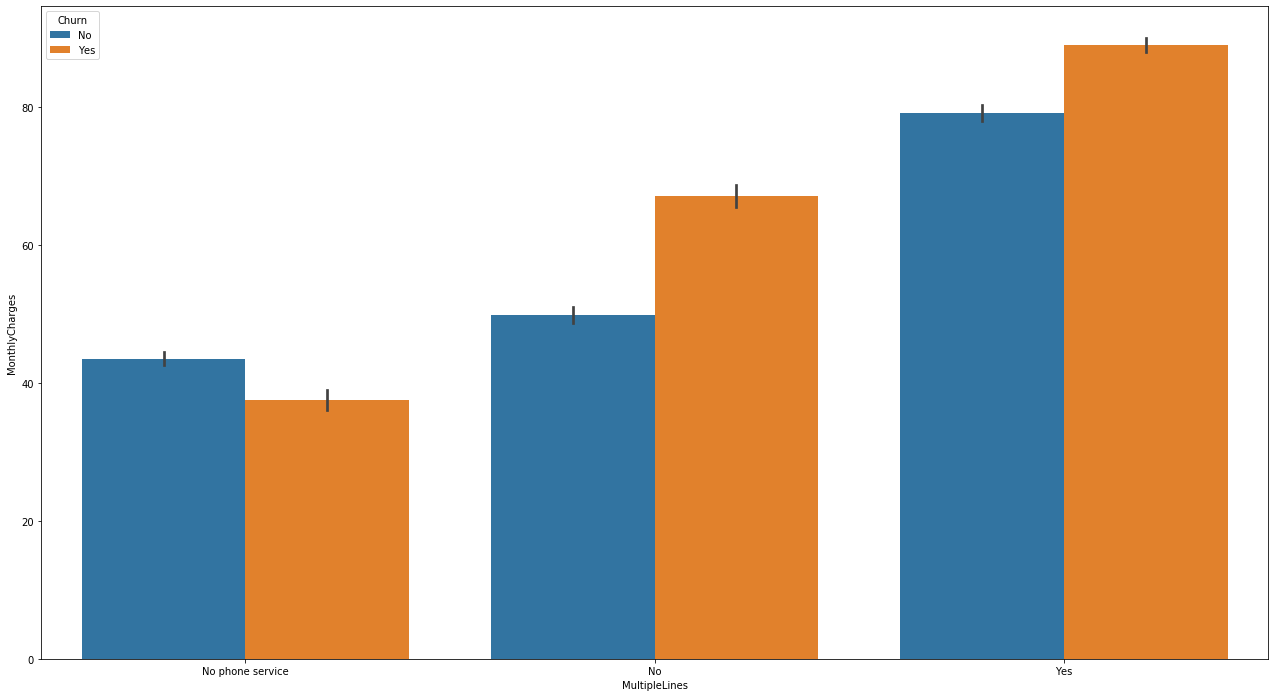

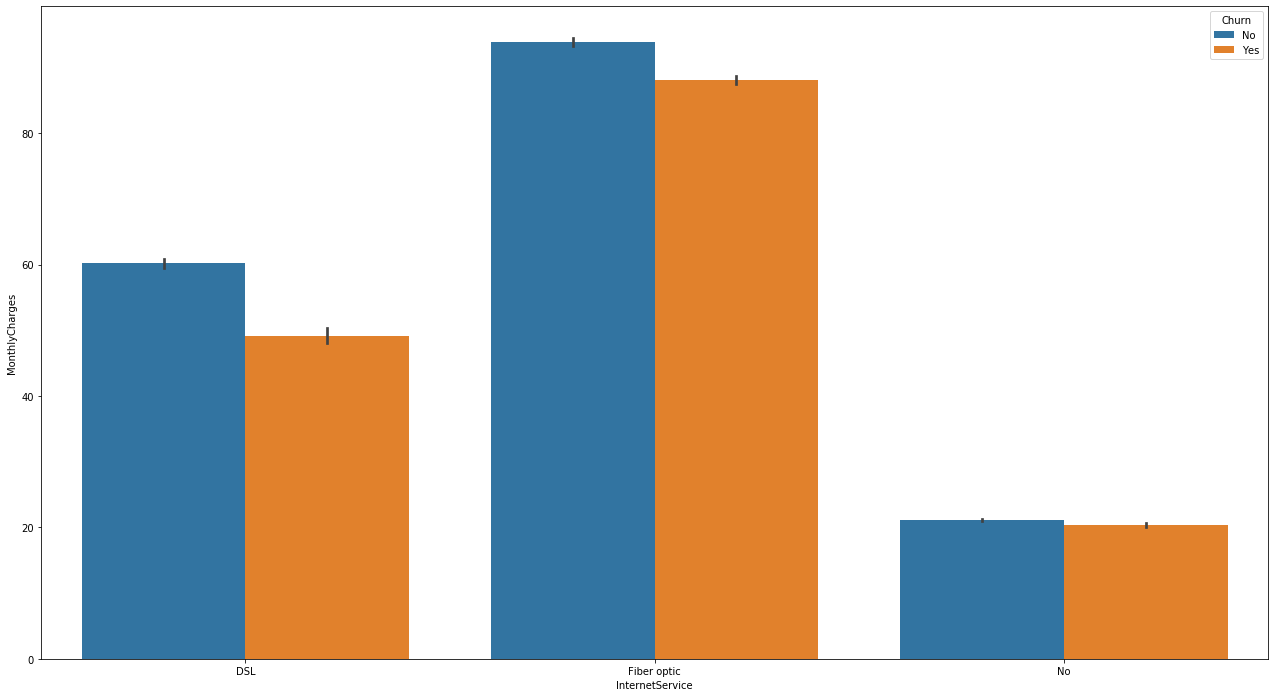

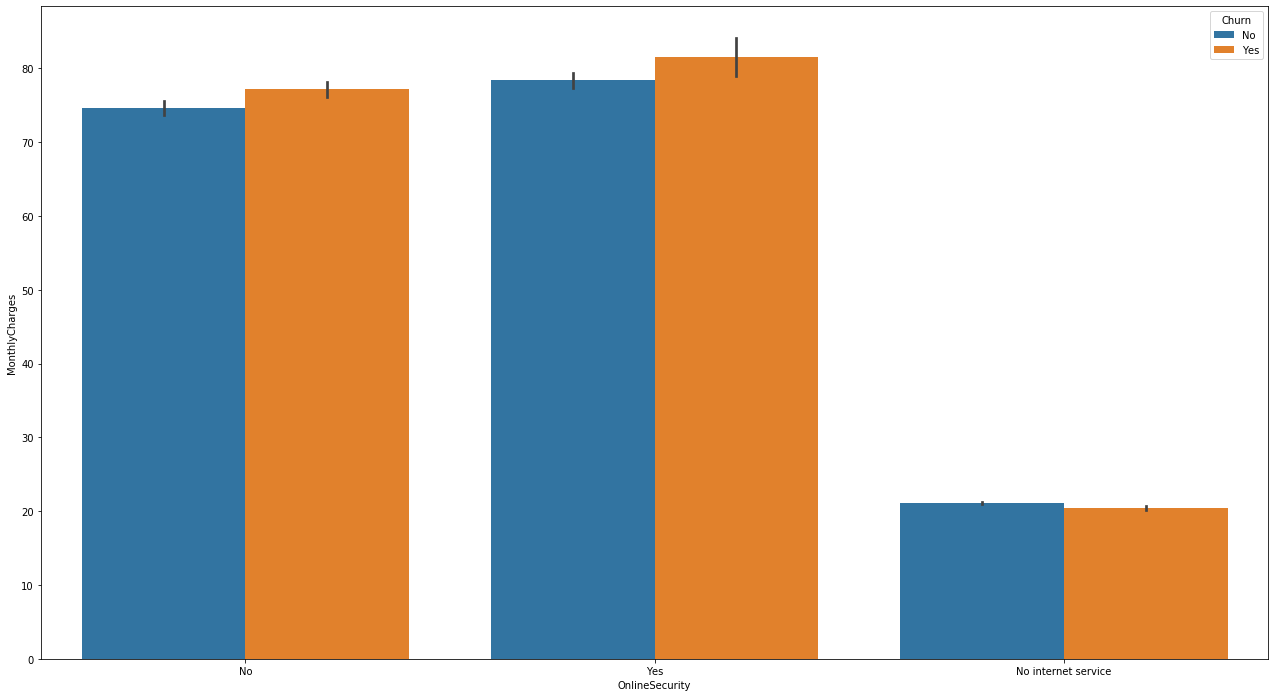

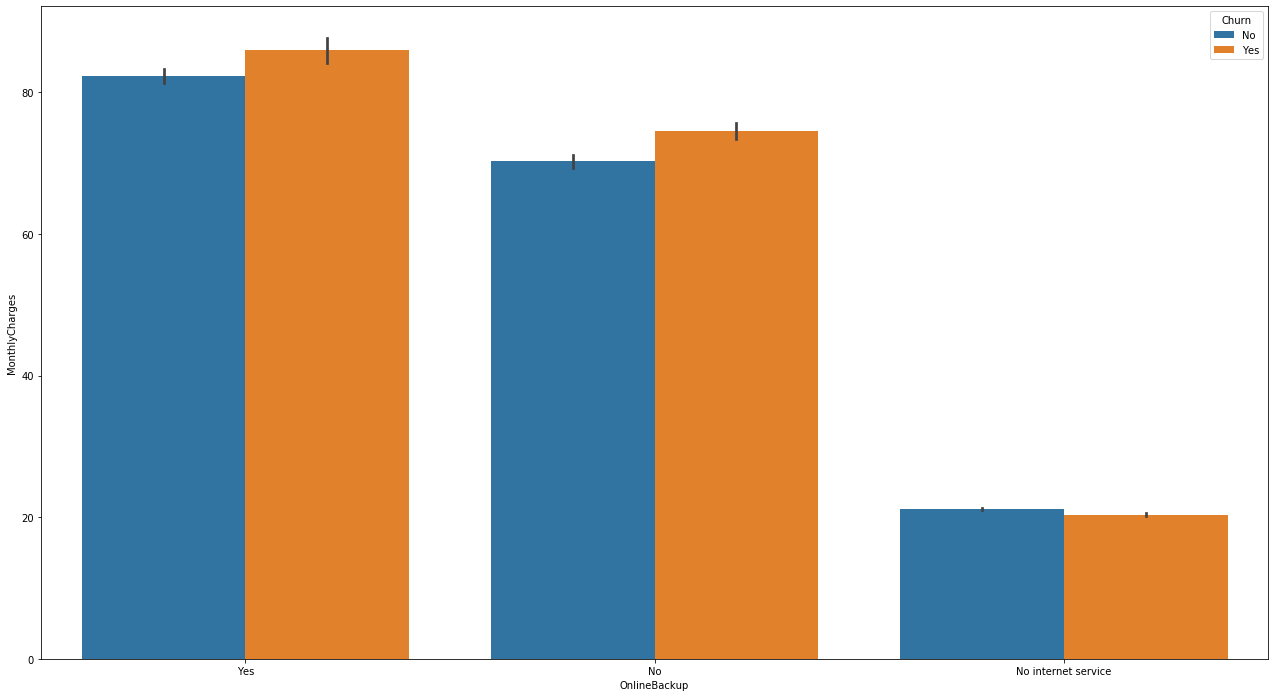

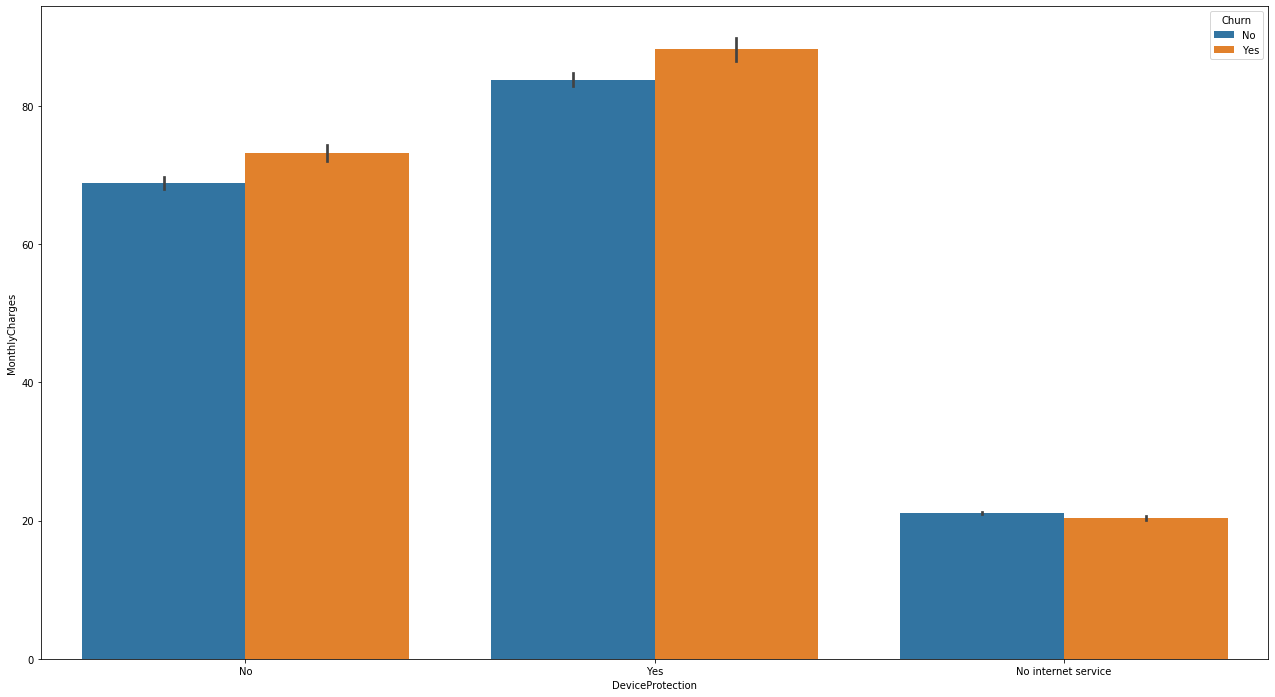

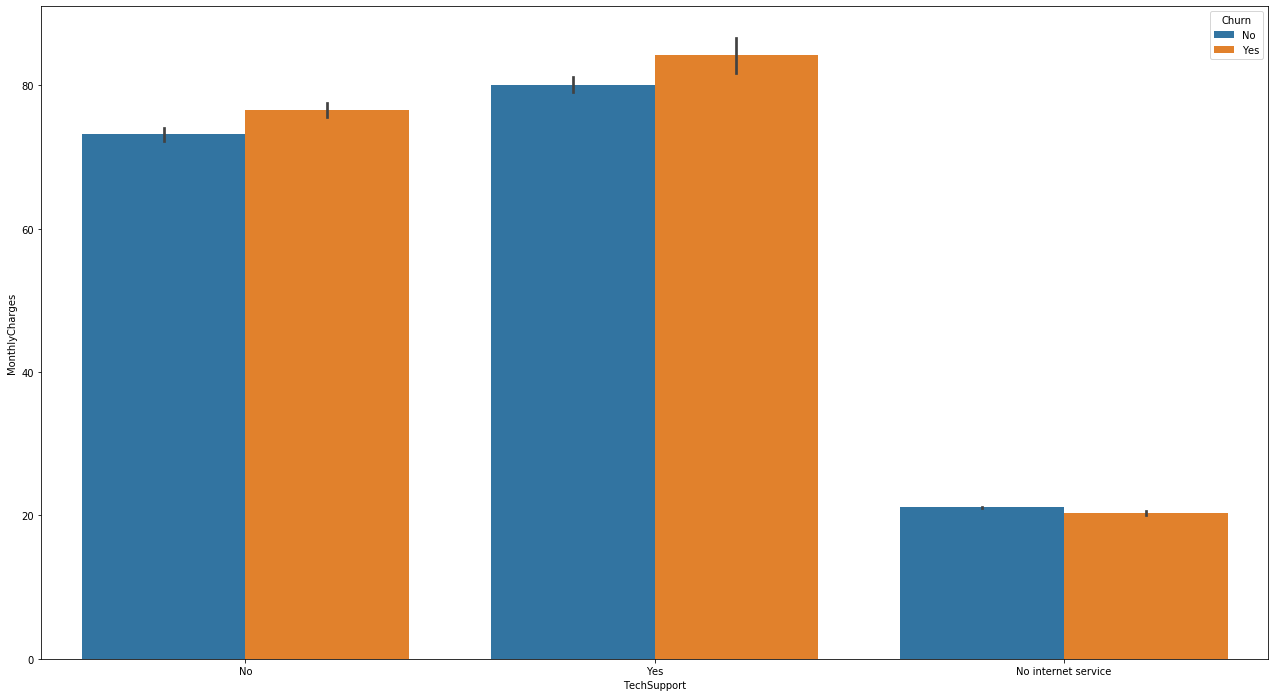

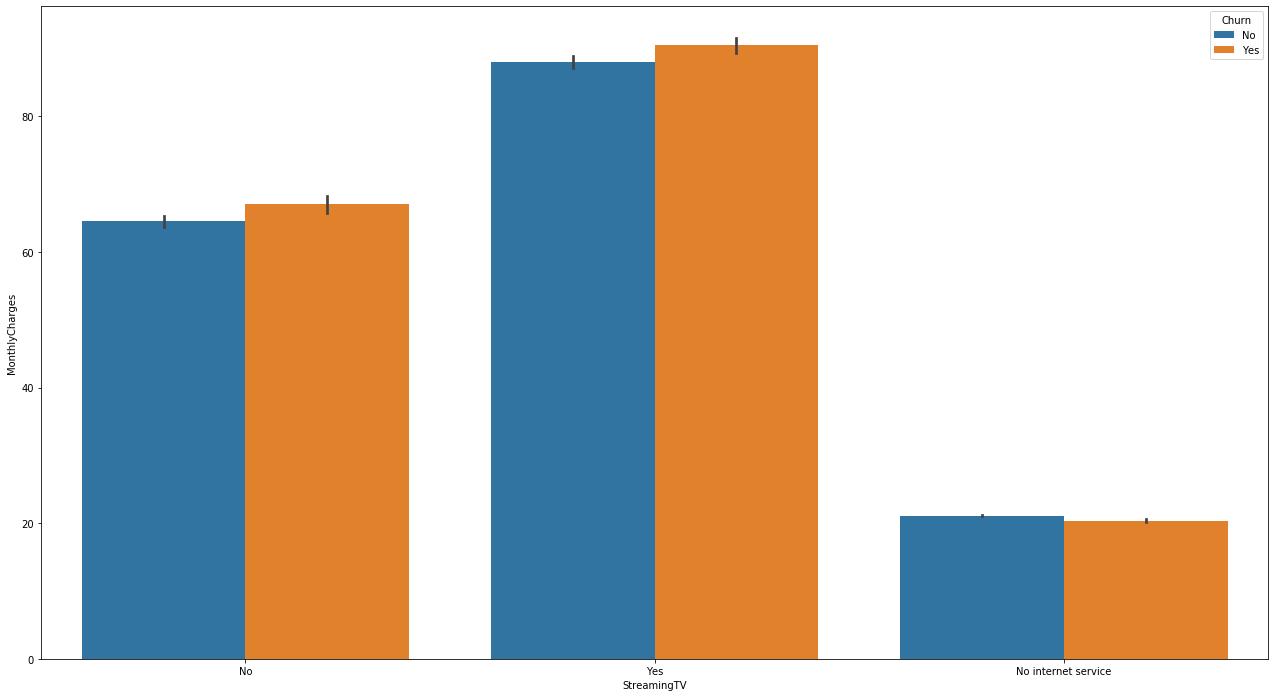

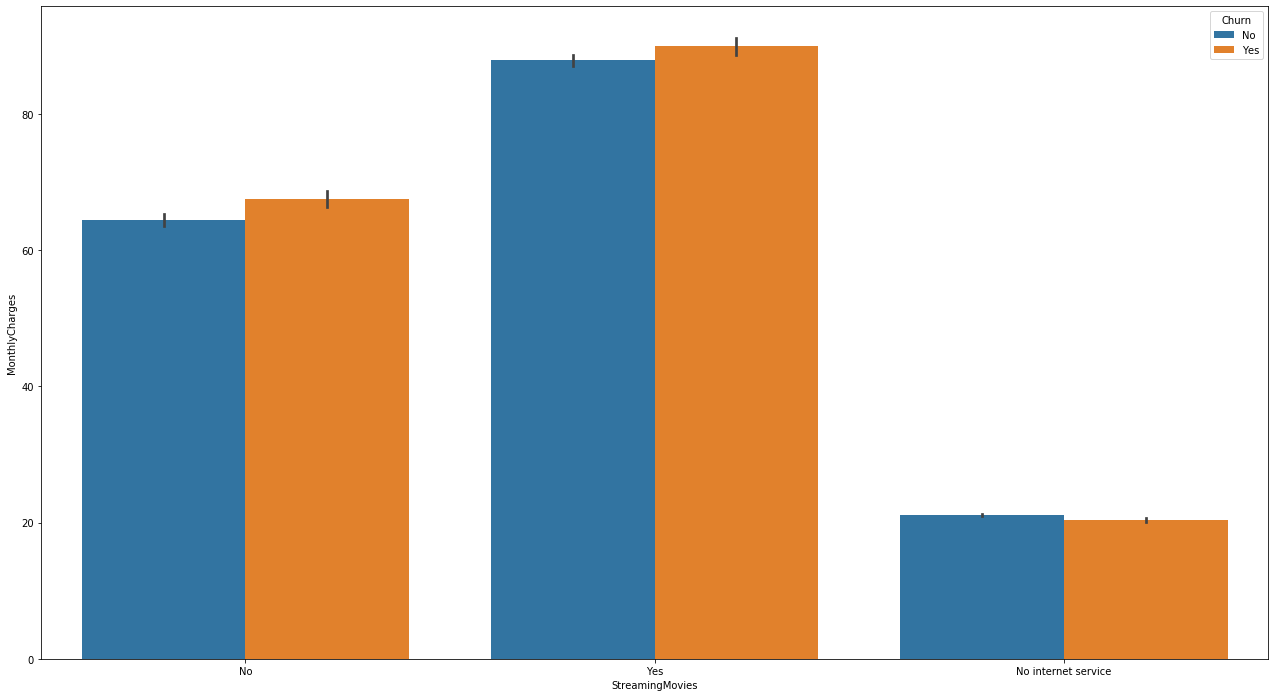

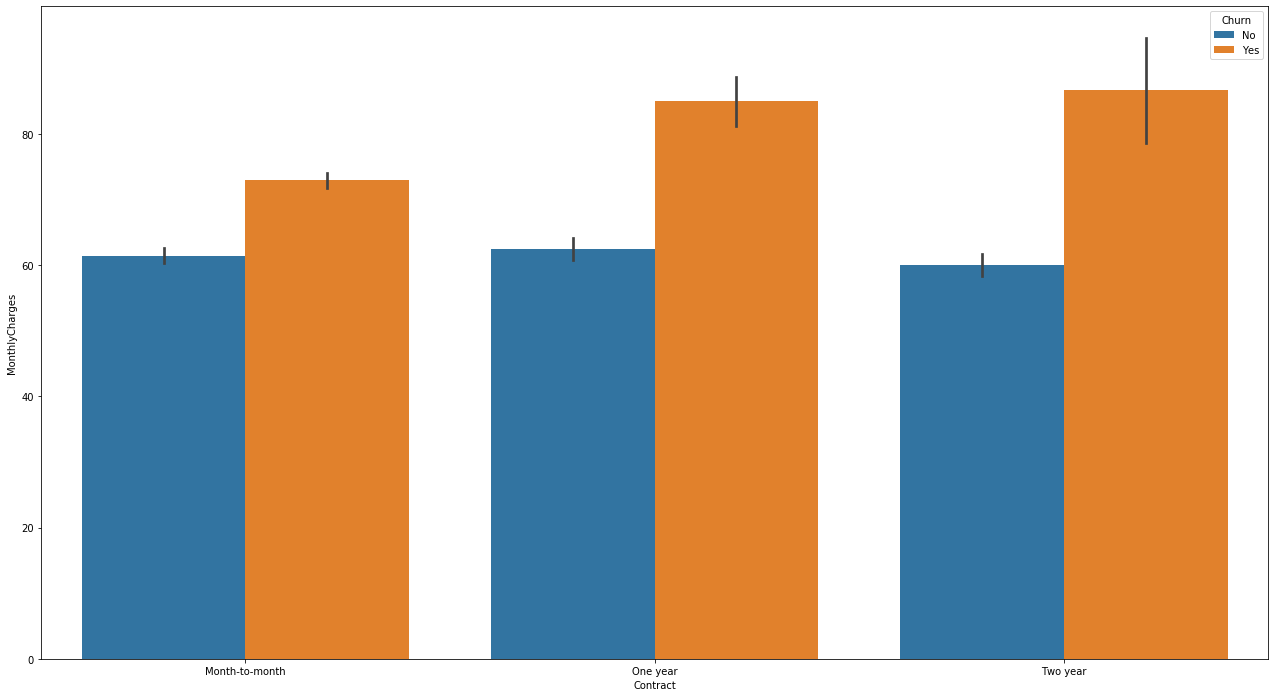

In [28]:
services=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract']
for service in services:
    plt.gcf().set_size_inches(22,12, forward=True)
    sns.barplot(x=service, y="MonthlyCharges", data=telco_churn, hue="Churn")
    plt.show()

In [32]:
phone_service=churn_no[churn_no['PhoneService']=="Yes"]

In [33]:
phone_service.groupby("Contract")["Churn"].count()

Contract
Month-to-month    1997
One year          1176
Two year          1489
Name: Churn, dtype: int64

In [30]:
#Answer - phone service, online security, & online back-up, monthly contract

3. Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium
b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

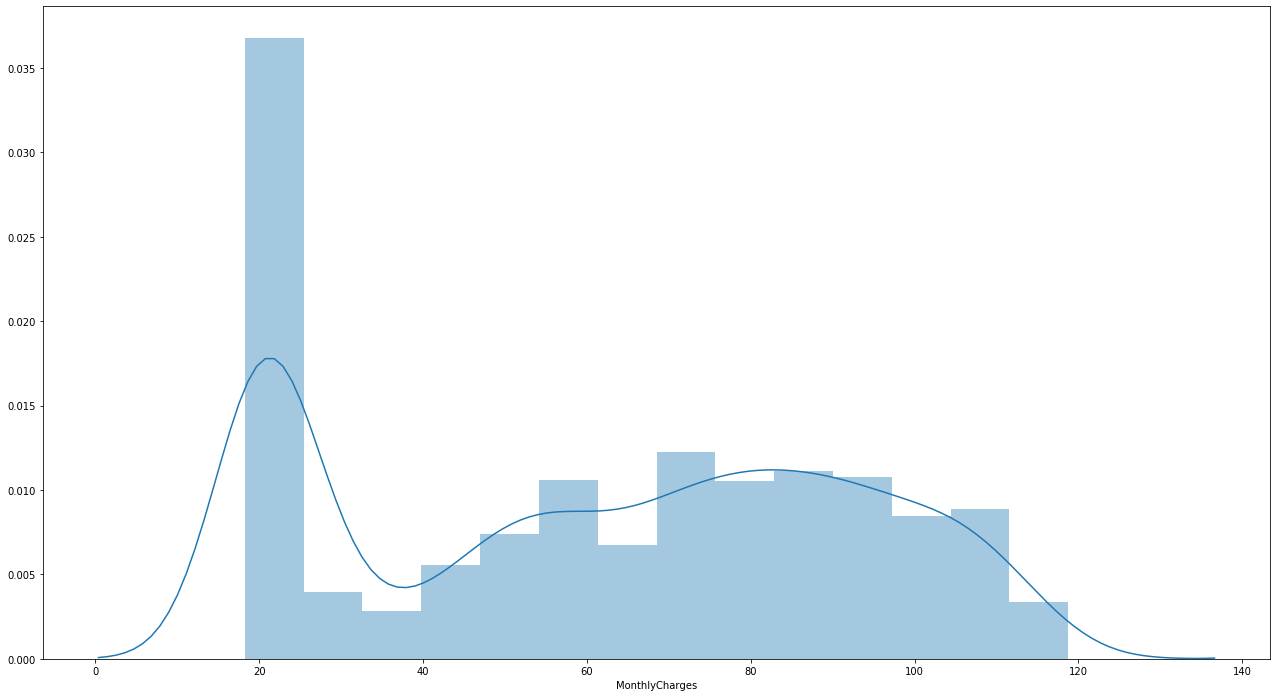

In [36]:
plt.gcf().set_size_inches(22,12, forward=True)
sns.distplot(churn_no["MonthlyCharges"])

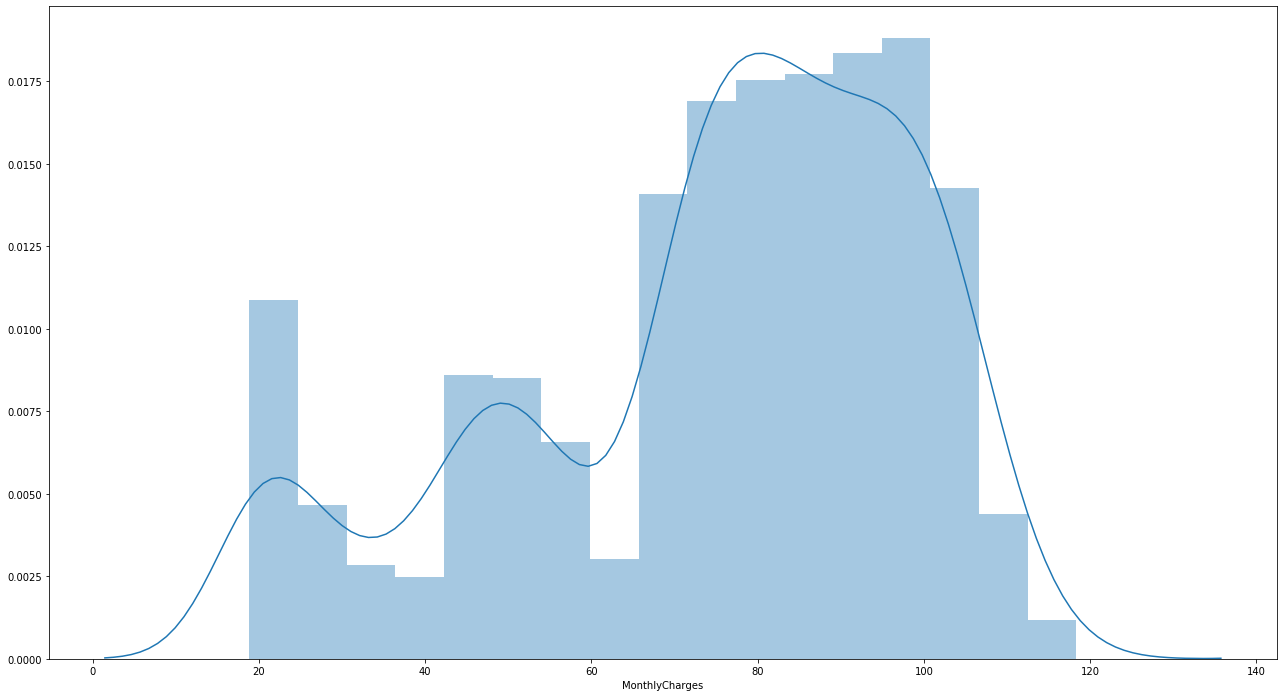

In [37]:
plt.gcf().set_size_inches(22,12, forward=True)
sns.distplot(churn_yes["MonthlyCharges"])

In [ ]:
#Answer- packages at usd 20, 60, 80

In [45]:
churn_no.groupby(["PaperlessBilling"])["Churn"].count()

PaperlessBilling
No     2403
Yes    2771
Name: Churn, dtype: int64

In [46]:
churn_yes.groupby(["PaperlessBilling"])["Churn"].count()

PaperlessBilling
No      469
Yes    1400
Name: Churn, dtype: int64

In [ ]:
#the company should not strictly go paperless because a big number of customers who are using paper are not churning